# 종합실습1 단변량 분석

# 1.비즈니스 시나리오

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
    * 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
        * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
        * 너무 국내 시장에 집중됨.
        * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
    * 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.

* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
    * 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
    * 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
    * 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


# 2.환경준비

## (1) 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩 : 카시트 판매량 데이터

|	변수명	|	설명	|	구분	|

|	----	|	----	|	----	|

|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|

|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|

|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|

|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|

|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|

|	Price 	|	 자사 지역별 판매가격	|	feature	|

|	ShelveLoc 	|	 진열상태	|	feature	|

|	Age 	|	 지역 인구의 평균 연령	|	feature	|

|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|

|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


# 3.단변량분석 : 숫자형 변수

## (1) Sales (Target) 

In [3]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량(수치화)

In [4]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

* 판매량이 0인 지역이 있다? 이상하다

3) 분포 확인(시각화)

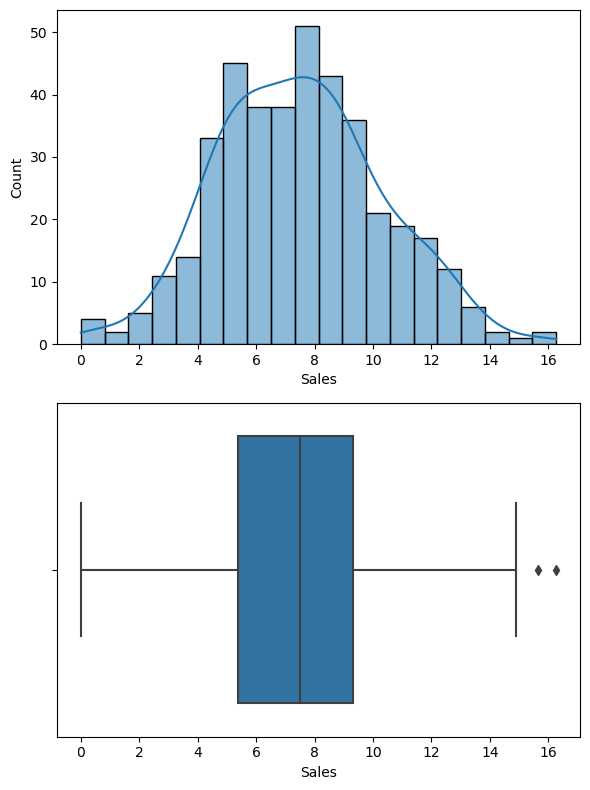

In [8]:
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde = True)

plt.subplot(2,1,2)
sns.boxplot(x = data[var])

plt.tight_layout()
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

5) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

## (2) CompPrice

In [16]:
var = 'CompPrice' #경쟁사 가격
var2 = 'Price' #자사 지역별 판매 가격

1) 변수의 비즈니스 의미

* 경쟁사 가격에 따라 판매량이 달라지는지

2) 기초통계량(수치화)

In [13]:
data[[var]].describe().T

,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


In [17]:
data[[var2]].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,400.0,115.795,23.676664,24.0,100.0,117.0,131.0,191.0


3) 분포 확인(시각화)

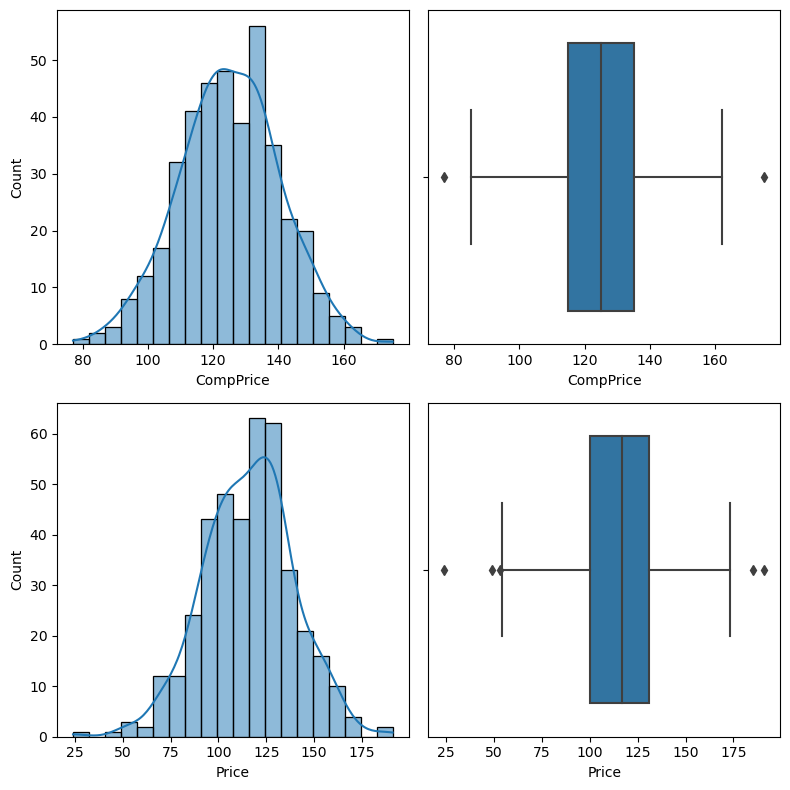

In [29]:
plt.figure(figsize = (8,8))
plt.subplot(221)
sns.histplot(data[var], bins = 20, kde = True)

plt.subplot(222)
sns.boxplot(x = data[var])

plt.subplot(223)
sns.histplot(data[var2], bins = 20, kde = True)

plt.subplot(224)
sns.boxplot(x = data[var2])

plt.tight_layout()
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* boxplot을 보았을 때, 자사의 가격이 경쟁사의 가격보다 높게 측정된 곳들이 좀 더 있다.  
* 가격적인 경쟁에서 밀리게 된다.

5) 추가 분석해 볼 사항이 있나요?

## (3) Income

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

## (4) Advertising

In [40]:
var = 'Advertising' #경쟁사 가격

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

In [41]:
tmp = data.loc[data[var] > 0]

3) 분포 확인(시각화)

<AxesSubplot:xlabel='Advertising', ylabel='Count'>

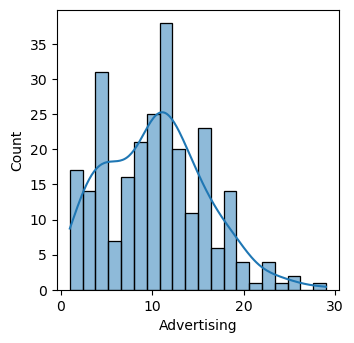

In [47]:
plt.figure(figsize = (8,8))
plt.subplot(221)
sns.histplot(tmp['Advertising'], bins = 20, kde = True)


4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

## (5) Population

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

## (6) Price

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

## (7) Age

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

# 4.단변량분석 : 범주형 변수

## (1) ShelveLoc

In [ ]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 기초통계량(수치화)

In [ ]:
# 범주별 빈도수
data[var].value_counts()

In [ ]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

3) 분포 확인(시각화)

In [ ]:
sns.countplot(data[var], order = ['Good','Medium','Bad'])
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태가 중간 정도 가 54%

5) 추가 분석해 볼 사항이 있나요?

* 진열상태에 따른 판매량 차이
* 지역, 인구수와 진열 상태 관계 비교

## (2) Urban

In [30]:
var = 'Urban'

1) 변수의 비즈니스 의미

* 도심 지역인지 아닌지 (Yes, No)

2) 기초통계량(수치화)

In [36]:
print(data[[var]].value_counts())
print()
print(data[[var]].value_counts() / data[[var]].shape[0])

Urban
Yes      282
No       118
dtype: int64

Urban
Yes      0.705
No       0.295
dtype: float64


3) 분포 확인(시각화)

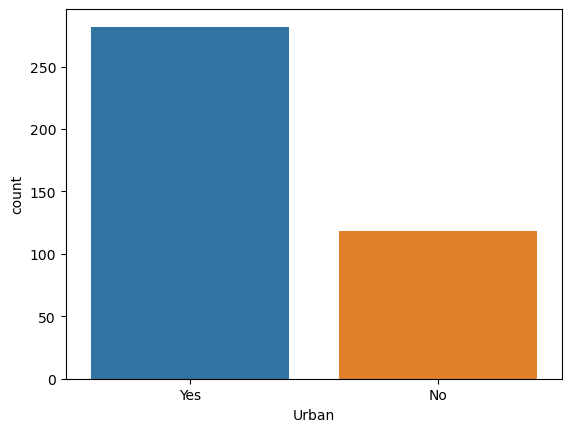

In [38]:
sns.countplot(x = data[var])
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

도시 생활을 하는 인구가 많다는 것을 알 수 있다.

5) 추가 분석해 볼 사항이 있나요?

## (3) US

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?